The next example also has a series of sites with $x$ coordinates on a regularly spaced grid (-50 nm to +50 nm with 1 nm spacings), however defects are specific to their sites. In this example, there is a site with two positively charged defects, followed by two sites which each have one negatively charged defects. This system almost simulates a system such as gadolinium doped ceria which has a +2 defect followed by two -1 defects, however using two defects which are equal but opposite in their valence. The concentration and positively and negatively charged defects are equal and therefore the system is charge neutral. In this case all of the sites have a segregation energy of zero which demonstrates how the defects would be arranged in the bulk structure and how this affects the potential.

In this example, Dirichlet boundary conditions are enforced which ensures the potential at the boundary sites is 0.0.

In [1]:
import os
os.getcwd()

import sys
sys.path.append('/Users/glw33/source/project')

#from project.set_up_calculation import load_site_data

#from project.defect_species import Defect_Species
#from project.set_of_sites import Set_of_Sites
#from project.constants import boltzmann_eV
from project.onedefect_onedopant_calculations import *
#from project.general_calculations import *

from project.defect_species import DefectSpecies
from project.grid import Grid
from project.calculation import Calculation
from project.set_of_sites import Set_of_Sites
from project.set_up_calculation import calculate_grid_offsets

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline

In [2]:
alpha = 0.0005

conv = 1e-5
grid_x_min = -2.2e-8
grid_x_max = +2.2e-8

#limits = [grid_x_min-5e-10, grid_x_max+5e-10]

dielectric = 1

index = 111

b = 5e-9
c = 5e-9

temp = [773.15]

boundary_conditions = 'dirichlet'

In [3]:
valence = [ +1.0, -1.0 ]
site_labels = ['site_1', 'site_2']
defect_labels = ['defect_1', 'defect_2']
mole_fractions = [ [ 0.2, 0.2 ] ]

In [4]:
desired_mobile_defect_mf = 0.2
percentage_dopant = 20

In [5]:
data_1 = '/Users/glw33/source/project/userguides/input_data/example_data_3_alternate_sites.txt'

In [6]:
limits = calculate_grid_offsets( data_1, grid_x_min, grid_x_max )
#print(min_offset, max_offset)

# limits = [grid_x_min-(min_offset/2), grid_x_max+(max_offset/2)]
#limits = [grid_x_min-5e-10, grid_x_max+5e-10]

for t, m in zip( temp, mole_fractions ):
    defect_species = { l : DefectSpecies( l, v, m ) for l, v, m in zip( defect_labels, valence, m) }
    
    all_sites = Set_of_Sites.set_of_sites_from_input_data( data_1, limits, defect_species )
        
    grid = Grid.grid_from_set_of_sites( all_sites, limits[0], limits[1], b, c )
    
    calculation_object = Calculation( grid, alpha, conv, t, boundary_conditions )
    
    calculation_object.solve()
    calculation_object.form_subgrids( site_labels )
    calculation_object.calculate_resistivity_ratio( desired_mobile_defect_mf )
    calculation_object.mole_fractions()
    
    
    
    
    
    #grid, phi, rho, probabilities, resistivity_ratio, defect_1_mole_fraction, defect_2_mole_fraction, bulk_density, niter = calculate_GB_properties( t, grid_x_min-5e-10, grid_x_max+5e-10, b, c, index, alpha, conv, desired_mobile_defect_mf, all_sites, site_labels, 'dirichlet' )
    

/usr/local/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


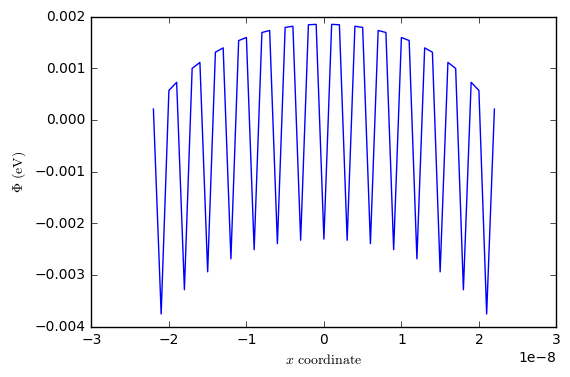

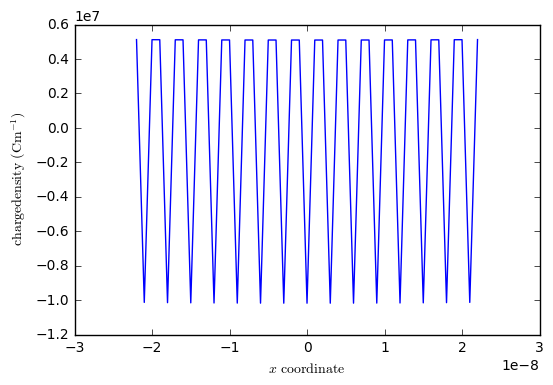

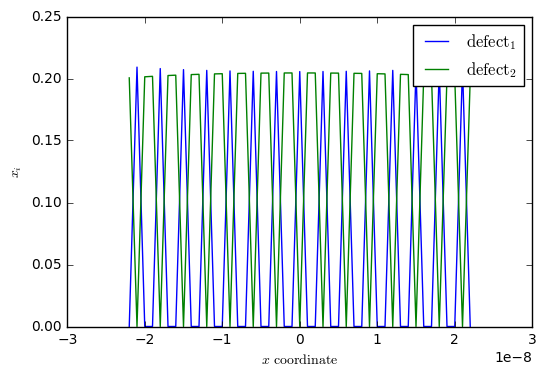

In [7]:
plt.plot(grid.x, calculation_object.phi)
plt.xlabel( '$x$ $\mathrm{coordinate}$' )

plt.ylabel('$\Phi$ $\mathrm{( eV )}$')
plt.show()

plt.plot(grid.x, calculation_object.rho)
plt.xlabel( '$x$ $\mathrm{coordinate}$'  )
plt.ylabel(' $\mathrm{charge density}$ $(\mathrm{C m}^{-1})$')
plt.show()

plt.plot(grid.x, calculation_object.mf[site_labels[0]], label = '$\mathrm{defect_1}$')
plt.plot(grid.x, calculation_object.mf[site_labels[1]], label = '$\mathrm{defect_2}$')
plt.xlabel( '$x$ $\mathrm{coordinate}$'  )
plt.ylabel('$x_{i}$')
plt.legend()
plt.show()

When using Dirichlet boundary conditions the potential at the boundary sites is fixed to 0.0. It can be seen from the figure above showing the potential against the $x$ coordinate, with this example using data which depicts alternating sites, the potential profile curves. This happens because no matter what the potential is calculated to be, the potential is forced to zero at the boundaries. In this example, the boundary sites are occupied by negatively charged defects and therefore these sites should have a slightly negative potential. The Dirichlet boundary conditions force these sites to have a potential of zero and therefore the potential profile curves. The change in the potential profile effects the charge density, causing the system to become negatively charged, losing charge neutrality. 

To prevent this from happening periodic boundary conditions can be enforced. Periodic boundary conditions consider the region of data as a unit cell with the final site equivalent to the initial site but not fixed to any particular value. The periodic boundary conditions are enforced using a double cumulative sum to find the potential and then adding a constant $c$. The $c$ which minimises the total charge density is used which means the restriction on the calculation is that charge neutrality is maintained rather than the boundary sites having a potential of zero.

In [8]:
boundary_conditions = 'periodic'

for t, m in zip( temp, mole_fractions ):
    defect_species = { l : DefectSpecies( l, v, m ) for l, v, m in zip( defect_labels, valence, m) }
    
    all_sites = Set_of_Sites.set_of_sites_from_input_data( data_1, limits, defect_species )
        
    grid = Grid.grid_from_set_of_sites( all_sites, limits[0], limits[1], b, c )
    
    calculation_object = Calculation( grid, alpha, conv, t, boundary_conditions )
    
    calculation_object.solve()
    calculation_object.form_subgrids( site_labels )
    calculation_object.calculate_resistivity_ratio( desired_mobile_defect_mf )
    calculation_object.mole_fractions()

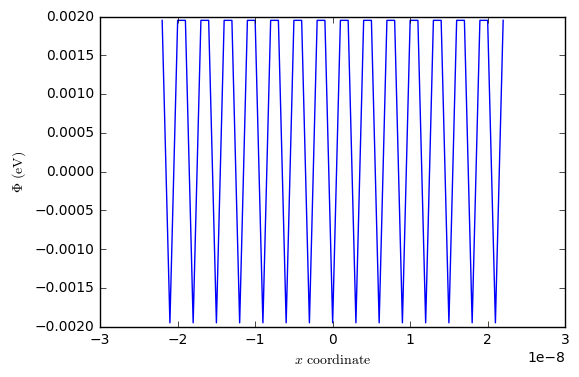

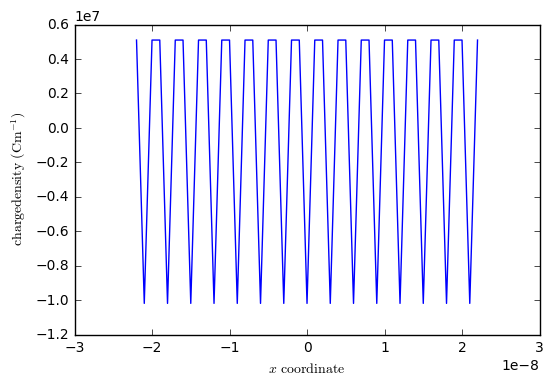

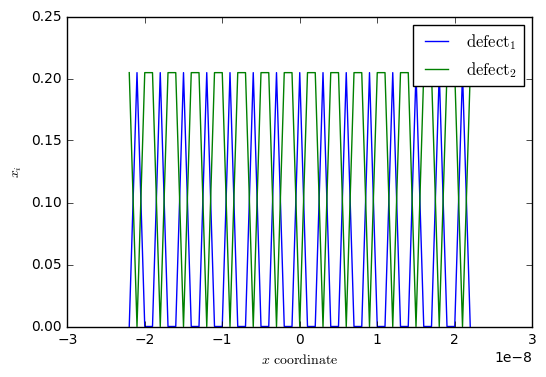

In [9]:
plt.plot(grid.x, calculation_object.phi)
plt.xlabel( '$x$ $\mathrm{coordinate}$' )

plt.ylabel('$\Phi$ $\mathrm{( eV )}$')
plt.show()

plt.plot(grid.x, calculation_object.rho)
plt.xlabel( '$x$ $\mathrm{coordinate}$'  )
plt.ylabel(' $\mathrm{charge density}$ $(\mathrm{C m}^{-1})$')
plt.show()

plt.plot(grid.x, calculation_object.mf[site_labels[0]], label = '$\mathrm{defect_1}$')
plt.plot(grid.x, calculation_object.mf[site_labels[1]], label = '$\mathrm{defect_2}$')
plt.xlabel( '$x$ $\mathrm{coordinate}$'  )
plt.ylabel('$x_{i}$')
plt.legend()
plt.show()

As shown above, when the periodic boundary conditions are used, the average charge across the system is 0.0 and the boundary potential is no longer being forced to 0.0 but is calculated along with the other sites using the Poisson-Boltzmann solver. 
The periodic boundary conditions can also be used with a system similar to the first example, where the central defect has a segregation energy of -1.0 eV but where the defects are specific to their sites.

In [10]:
data_2 = '/Users/glw33/source/project/userguides/input_data/example_data_4_alternate_sites_one_defect.txt' 

In [14]:
conv = 1e-4
boundary_conditions = 'periodic'

for t, m in zip( temp, mole_fractions ):
    defect_species = { l : DefectSpecies( l, v, m ) for l, v, m in zip( defect_labels, valence, m) }
    
    all_sites = Set_of_Sites.set_of_sites_from_input_data( data_2, limits, defect_species )
        
    grid = Grid.grid_from_set_of_sites( all_sites, limits[0], limits[1], b, c )
    
    calculation_object = Calculation( grid, alpha, conv, t, boundary_conditions )
    
    calculation_object.solve()
    calculation_object.form_subgrids( site_labels )
    calculation_object.calculate_resistivity_ratio( desired_mobile_defect_mf )
    calculation_object.mole_fractions()

KeyboardInterrupt: 

In [ ]:
plt.plot(grid.x, calculation_object.phi)
plt.xlabel( '$x$ $\mathrm{coordinate}$' )

plt.ylabel('$\Phi$ $\mathrm{( eV )}$')
plt.show()

plt.plot(grid.x, calculation_object.rho)
plt.xlabel( '$x$ $\mathrm{coordinate}$'  )
plt.ylabel(' $\mathrm{charge density}$ $(\mathrm{C m}^{-1})$')
plt.show()

plt.plot(grid.x, calculation_object.mf[site_labels[0]], label = '$\mathrm{defect_1}$')
plt.plot(grid.x, calculation_object.mf[site_labels[1]], label = '$\mathrm{defect_2}$')
plt.xlabel( '$x$ $\mathrm{coordinate}$'  )
plt.ylabel('$x_{i}$')
plt.legend()
plt.show()

In [13]:
# phi_scipy = [  1.75467908e-06,  -3.50935816e-06,   1.75467908e-06,   1.75467908e-06,
#   -3.50935816e-06,   1.75467908e-06,   1.75467908e-06,  -3.50935816e-06,
#    1.75467908e-06,   1.75467908e-06, -3.50935816e-06,   1.75467908e-06,
#    1.75467908e-06,  -3.50935816e-06, 1.75467908e-06,   1.75467908e-06,
#   -3.50935816e-06,   1.75467908e-06,   1.75467908e-06,  -3.50935816e-06,
#    1.75467908e-06,   1.75467908e-06,  -3.50935816e-06,   1.75467908e-06,
#    1.75467908e-06,  -3.50935816e-06,   1.75467908e-06,   1.75467908e-06,
#   -3.50935816e-06,  1.75467908e-06,   1.75467908e-06,  -3.50935816e-06,
#    1.75467908e-06,   1.75467908e-06,  -3.50935816e-06,   1.75467908e-06,
#    1.75467908e-06,  -3.50935816e-06,   1.75467908e-06,   1.75467908e-06,
#   -3.50935816e-06,   1.75467908e-06,   1.75467908e-06,  -3.50935816e-06,
#    1.75467908e-06]

# phi_numpy = [  1.55947767e-06,  -3.70455958e-06,   1.55947767e-06,   1.55947767e-06,
#   -3.70455958e-06,   1.55947767e-06,   1.55947767e-06,  -3.70455958e-06,
#    1.55947767e-06,   1.55947767e-06,  -3.70455958e-06,  1.55947767e-06,
#    1.55947767e-06,  -3.70455958e-06,   1.55947767e-06,   1.55947767e-06,
#   -3.70455958e-06,   1.55947767e-06,   1.55947767e-06,  -3.70455958e-06,
#    1.55947767e-06,   1.55947767e-06,  -3.70455958e-06,   1.55947767e-06,
#    1.55947767e-06,  -3.70455958e-06,   1.55947767e-06,   1.55947767e-06,
#   -3.70455958e-06,   1.55947767e-06,   1.55947767e-06,  -3.70455958e-06,
#    1.55947767e-06,   1.55947767e-06,  -3.70455958e-06,   1.55947767e-06,
#    1.55947767e-06,  -3.70455958e-06,   1.55947767e-06,   1.55947767e-06,
#   -3.70455958e-06,   1.55947767e-06,   1.55947767e-06,  -3.70455958e-06,
#    1.55947767e-06]

# phi_scipy_sparce = [  8.47613020e-06,   3.21209296e-06,   8.47613020e-06,   8.47613020e-06,
#    3.21209296e-06,  8.47613020e-06,   8.47613020e-06,   3.21209296e-06,
#    8.47613020e-06,   8.47613020e-06,   3.21209296e-06,   8.47613020e-06,
#    8.47613020e-06,   3.21209296e-06,   8.47613020e-06,   8.47613020e-06,
#    3.21209296e-06,   8.47613020e-06,   8.47613020e-06,   3.21209296e-06,
#    8.47613020e-06,   8.47613020e-06,   3.21209296e-06,   8.47613020e-06,
#    8.47613020e-06,   3.21209296e-06,   8.47613020e-06,   8.47613020e-06,
#    3.21209296e-06,   8.47613020e-06,   8.47613020e-06,   3.21209296e-06,
#    8.47613020e-06,   8.47613020e-06,   3.21209296e-06,  8.47613020e-06,
#    8.47613020e-06,   3.21209296e-06,   8.47613020e-06,  8.47613020e-06,
#    3.21209296e-06,   8.47613020e-06,   8.47613020e-06,  3.21209296e-06,
#    8.47613020e-06]

# plt.plot( grid.x, phi_scipy, label = 'phi_scipy' )
# plt.plot( grid.x, phi_numpy, label = 'phi_numpy' )
# plt.plot( grid.x, phi_scipy_sparce, label = 'phi_scipy_sparce' )
# plt.legend()
# plt.show()